<a href="https://colab.research.google.com/github/genaiconference/Agentic_RAG_Workshop/blob/main/00_react_agent_demo_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U langchain==0.3.25 langchain-openai==0.3.16 langchain-community==0.3.23 duckduckgo-search==8.0.1 --quiet

In [3]:
import os
import getpass

# Set OpenAI API Key
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API Key: ")

Enter your OpenAI API Key: ··········


In [4]:
from langchain_openai import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.tools import Tool
from langchain_community.tools import DuckDuckGoSearchRun

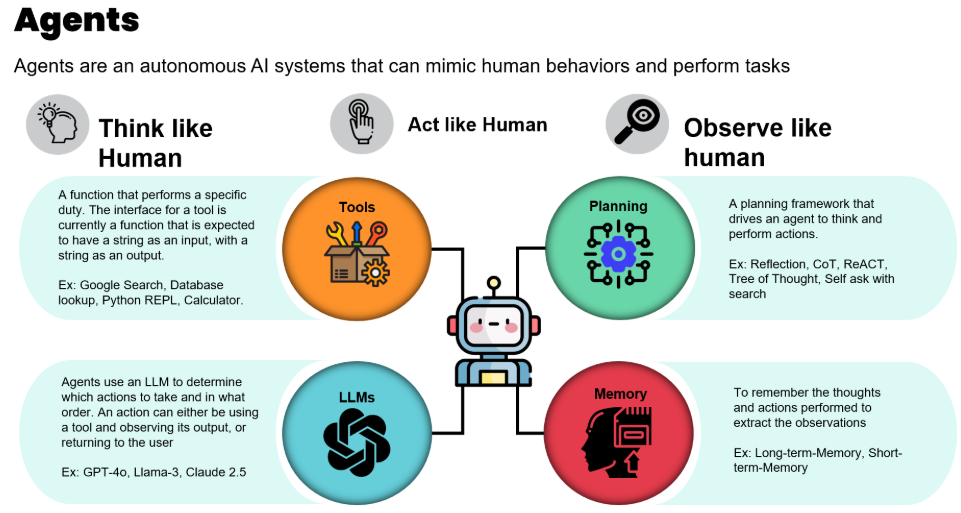

## Define Tools

### 1. custom_calculator Function
This code defines a simple custom calculator and wraps it as a LangChain Tool for use by agents.

In [5]:
def custom_calculator(expression: str) -> str:
    try:
        result = eval(expression)
        return str(result)
    except Exception as e:
        return f"Error evaluating expression: {e}"


🔹 Purpose:
Evaluates a Python-style arithmetic expression (like "3 + 4 * 2").

🔹 Parameters:
expression: str → A string input representing the math expression.

🔹 How it works:
Uses Python’s built-in eval() to evaluate the arithmetic string.

Wraps the evaluation in a try-except block to catch and return any errors as a string.



```
custom_calculator("10 + 5 * 3")  # Returns "25"
custom_calculator("10 / 0")      # Returns "Error evaluating expression: division by zero"

```



### 2. calculator_tool Definition

Registers custom_calculator as a tool using the LangChain-compatible Tool class.

In [6]:
calculator_tool = Tool(
    name="Custom Calculator",
    func=custom_calculator,
    description="Evaluates mathematical expressions using Python's eval. Input should be a valid Python arithmetic expression."
)

🔹 Purpose:
Registers custom_calculator as a tool using the LangChain-compatible Tool class.

🔹 Fields:
name – The tool's label (shown to the agent).

func – The callable function the agent can invoke.

description – Instructions shown to the agent so it knows when and how to use the tool.

### Web Search Tool

In [7]:
search_tool = DuckDuckGoSearchRun()

In [8]:
tools = [search_tool, calculator_tool]

## Define LLM

In [9]:
llm = ChatOpenAI(temperature=0, model="gpt-4.1-nano-2025-04-14")


## Initialize the ReAct Agent

ReAct Framework: The agent uses the ReAct paradigm, which interleaves reasoning steps ("Thought") with actions ("Action") and observations ("Observation"). This structure allows the agent to iteratively reason about a problem, take actions (like calling tools), and incorporate the results into its subsequent reasoning steps.

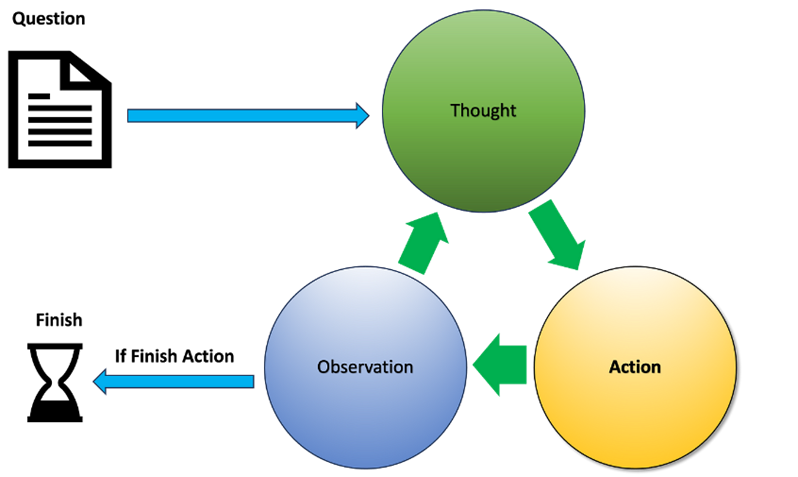

In [10]:
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

/tmp/ipython-input-175137340.py:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(


The AgentType.ZERO_SHOT_REACT_DESCRIPTION in LangChain refers to a specific agent configuration that employs the ReAct (Reasoning and Acting) framework. This agent type is designed to process user inputs by reasoning through the problem and deciding on actions (such as invoking tools) without relying on prior examples or chat history—hence the term "zero-shot."

In [11]:
# @title
#  jupyter cell responses to be wrapped to avoid scrolling

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


## Demo Time

In [13]:
question = "If I invest INR 100 at 10% simple interest annually, what will it be worth in 10 years?"
response = agent.invoke(question)
print(f"Answer: {response['output']}")



> Entering new AgentExecutor chain...
Thought: To find the future value with simple interest, I can use the formula: A = P(1 + rt), where P is the principal, r is the annual interest rate, and t is the time in years. Plugging in the values: P = 100, r = 0.10, t = 10. I'll calculate this to find the total amount after 10 years.
Action: Custom Calculator
Action Input: 100 * (1 + 0.10 * 10)
Observation: 200.0
Thought:Final Answer: The investment will be worth INR 200 after 10 years.

> Finished chain.
Answer: The investment will be worth INR 200 after 10 years.


In [14]:
question = "What is Decaprio's girl friend's age's square root?"

response = agent.invoke(question)
print(f"Answer: {response['output']}")



> Entering new AgentExecutor chain...
Question: What is Decaprio's girl friend's age's square root?
Thought: I need to find out who Leonardo DiCaprio's current girlfriend is and her age, then calculate the square root of her age.
Action: duckduckgo_search
Action Input: Leonardo DiCaprio current girlfriend age

DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

In [ ]:
question = "How many terrorist camps were destroyed by India? What is the ratio of casualities at Phalgam attack and Pakistani terrorists"

response = agent.invoke(question)
print(f"Answer: {response['output']}")



> Entering new AgentExecutor chain...
Question: How many terrorist camps were destroyed by India? What is the ratio of casualties at Phalgam attack and Pakistani terrorists
Thought: I need to find recent information about terrorist camps destroyed by India and details about the Phalgam attack casualties and Pakistani terrorists casualties. I'll start by searching for recent news on Indian military actions against terrorist camps.
Action: duckduckgo_search
Action Input: recent Indian military operations terrorist camps destroyed

DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit